Standart image


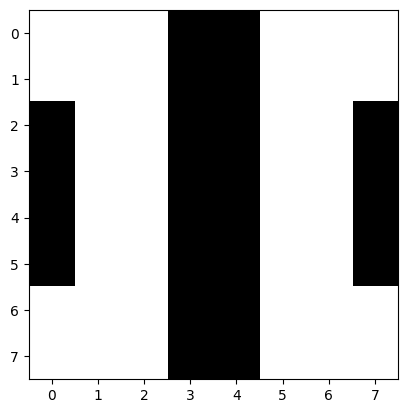

Noisy image


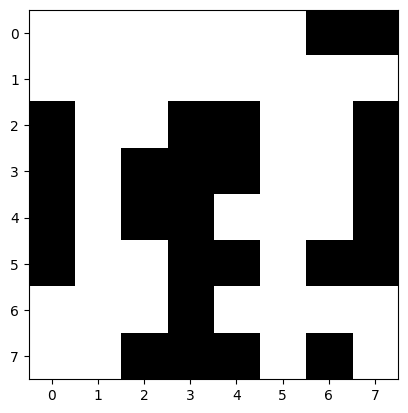

Restored image


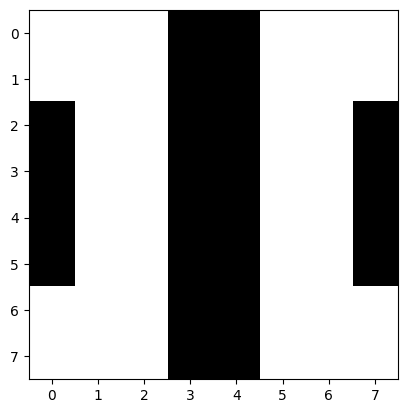

Standart image


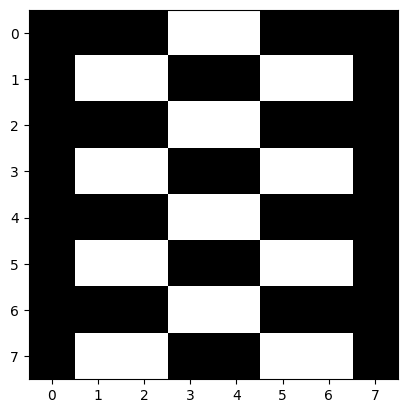

Noisy image


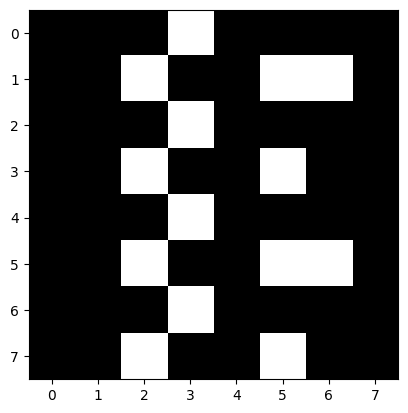

Restored image


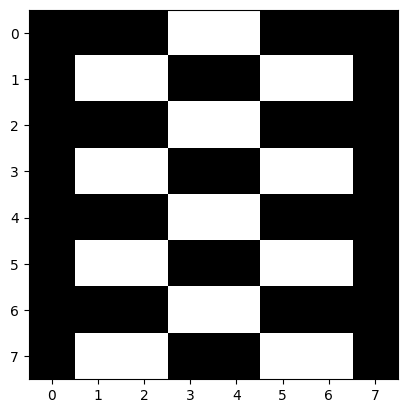

In [9]:
from matplotlib import pyplot
import numpy


def show_image(arr):
    pyplot.imshow(arr, interpolation='nearest', cmap='gray')
    pyplot.show()
    
def function_of_activation(number):
    if (number >= 0): 
        return 1
    else: 
        return -1

def clear(W, img):
    result = numpy.zeros((height, width))
    for a in range(width):
        for b in range(height):
            test = (W[b] * img[a])
            res = function_of_activation(numpy.sum(test))
            result[a][b] = res
    return result

def clearing_noise(W, image):
    result = clear(W, image)
    iterations = 0
    while iterations <= 1000:
        iterations += 1
        for a in range(width):
                for b in range(height):
                    test = (W[b] * result[a])
                    res = function_of_activation(numpy.sum(test))
                    result[a][b] = res        
        return result

global height, width, result
height = 8
width = 8

W = numpy.zeros((height, width))
X = [[1, 1, 1, -1, -1, 1, 1, 1],
     [1, 1, 1, -1, -1, 1, 1, 1],
     [-1, 1, 1, -1, -1, 1, 1, -1],
     [-1, 1, 1, -1, -1, 1, 1, -1],
     [-1, 1, 1, -1, -1, 1, 1, -1],
     [-1, 1, 1, -1, -1, 1, 1, -1],
     [1, 1, 1, -1, -1, 1, 1, 1],
     [1, 1, 1, -1, -1, 1, 1, 1]]

Y = [[-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1],
     [-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1],
     [-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1],
     [-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1]]

v_standart = []
v_standart.append(X)
v_standart.append(Y)

image_with_noise1 = [[1, 1, 1, 1, 1, 1, -1, -1],
                    [1, 1, 1, 1, 1, 1, 1, 1],
                    [-1, 1, 1, -1, -1, 1, 1, -1],
                    [-1, 1, -1, -1, -1, 1, 1, -1],
                    [-1, 1, -1, -1, 1, 1, 1, -1],
                    [-1, 1, 1, -1, -1, 1, -1, -1],
                    [1, 1, 1, -1, 1, 1, 1, 1],
                    [1, 1, -1, -1, -1, 1, -1, 1]]

image_with_noise2 = [[-1, -1, -1, 1, -1 , -1 , -1, -1],
                    [-1, -1, 1, -1, -1 , 1 , 1, -1],
                    [-1, -1, -1, 1, -1, -1 , -1, -1],
                    [-1, -1, 1, -1, -1 , 1 , -1, -1],
                    [-1, -1, -1, 1, -1, -1 , -1, -1],
                    [-1, -1, 1, -1, -1 , 1 , 1, -1],
                    [-1, -1, -1, 1, -1, -1 , -1, -1],
                    [-1, -1, 1, -1, -1 , 1 , -1, -1]]

image_with_noise3 = [[ 1,  1, 1, -1, -1, 1, 1, 1],
                    [ 1,  1, -1, -1, -1, -1, 1, 1],
                    [ 1,  1, -1, -1, 1, -1, 1, 1],
                    [ 1,  1, 1, -1, -1, 1, 1, 1],
                    [ 1,  1, -1, 1, 1, -1, 1, 1],
                    [ 1,  1, -1, 1, 1, -1, 1, 1],
                    [ 1,  1, -1, 1, 1, -1, -1, 1],
                    [ 1,  -1, -1, 1, 1, -1, -1, 1]]

X = numpy.array(X)
Y = numpy.array(Y)

image_with_noise1 = numpy.array(image_with_noise1)
image_with_noise2 = numpy.array(image_with_noise2)
image_with_noise3 = numpy.array(image_with_noise3)

v_noise = []
v_noise.append(image_with_noise1)
v_noise.append(image_with_noise2)
v_noise.append(image_with_noise3)


for i in range(len(v_standart)):
    W_buff = numpy.transpose(v_standart[i]) @ v_standart[i]
    for j in range(height):
        W_buff[j][j] = 0
    for a in range(height):
        for b in range(width):
            W [a][b] = (W[a][b] + W_buff[a][b])
for i in range(height):
    for j in range(width):
        W[i][j] = W[i][j] / len(v_standart)

for image in v_noise:
    result = clearing_noise(W, image)
    for standart in v_standart:
        for a in range(height):
            for b in range(width):
                if result[a][b] != standart[a][b]:
                    break
                elif a == height - 1 and b == width - 1 and result[a][b] == standart[a][b]:
                    print("Standart image")
                    show_image(standart)
                    print("Noisy image")
                    show_image(image)
                    print("Restored image")
                    show_image(result)


In [ ]:
# Testing data

X = [[ 1,  1, -1, -1, -1, -1, 1, 1],
     [ 1,  1, -1, -1, -1, -1, 1, 1],
     [ 1,  1, -1, -1, -1, -1, 1, 1],
     [ 1,  1, -1, -1, -1, -1, 1, 1],
     [ 1,  1, -1, 1, 1, -1, 1, 1],
     [ 1,  1, -1, 1, 1, -1, 1, 1],
     [ 1,  1, -1, 1, 1, -1, 1, 1],
     [ 1,  1, -1, 1, 1, -1, 1, 1]]

image_with_noise = [[ 1,  1, 1, -1, -1, 1, 1, 1],
                    [ 1,  1, -1, -1, -1, -1, 1, 1],
                    [ 1,  1, -1, -1, 1, -1, 1, 1],
                    [ 1,  1, 1, -1, -1, 1, 1, 1],
                    [ 1,  1, -1, 1, 1, -1, 1, 1],
                    [ 1,  1, -1, 1, 1, -1, 1, 1],
                    [ 1,  1, -1, 1, 1, -1, -1, 1],
                    [ 1,  -1, -1, 1, 1, -1, -1, 1]]

X = [[-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1],
     [-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1],
     [-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1],
     [-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1]]

image_with_noise = [[-1, -1, -1, 1, -1 , -1 , -1, -1],
                    [-1, -1, 1, -1, -1 , 1 , 1, -1],
                    [-1, -1, -1, 1, -1, -1 , -1, -1],
                    [-1, -1, 1, -1, -1 , 1 , -1, -1],
                    [-1, -1, -1, 1, -1, -1 , -1, -1],
                    [-1, -1, 1, -1, -1 , 1 , 1, -1],
                    [-1, -1, -1, 1, -1, -1 , -1, -1],
                    [-1, -1, 1, -1, -1 , 1 , -1, -1]]

X = [[-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1],
     [-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1],
     [-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1],
     [-1, -1, -1, 1, 1 , -1 , -1, -1],
     [-1, 1, 1, -1, -1 , 1 , 1, -1]]